In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
DAX = data.DataReader('^GDAXI', data_source='yahoo', start='1/1/2001')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4291 entries, 2001-01-02 to 2017-10-04
Data columns (total 6 columns):
Open         4258 non-null float64
High         4258 non-null float64
Low          4258 non-null float64
Close        4258 non-null float64
Adj Close    4258 non-null float64
Volume       4258 non-null float64
dtypes: float64(6)
memory usage: 234.7 KB


In [15]:
DAX['LogReturns'] = np.log(DAX['Close']/DAX['Close'].shift(1))

In [16]:
DAX['MovingVol'] = DAX['LogReturns'].rolling(window=252).std() * np.sqrt(252)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fde88b59d90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fde856079d0>], dtype=object)

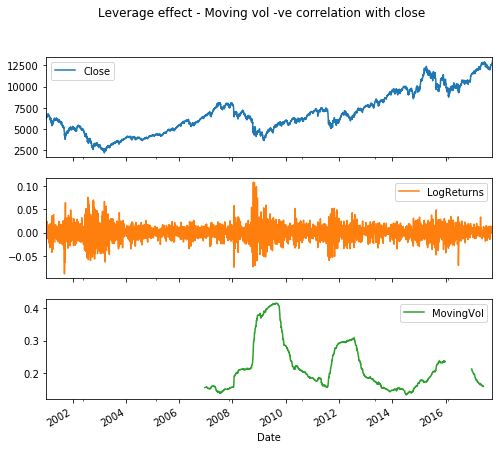

In [17]:


DAX[['Close','LogReturns','MovingVol']].plot(title='Leverage effect - Moving vol -ve correlation with close', subplots=True, figsize=(8, 7))

In [4]:
# code to download eurostoxx and vstoxx

import pandas as pd
from urllib import urlretrieve
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'
#urlretrieve(es_url,'./data/es.txt')
#urlretrieve(vs_url,'./data/vs.txt')
#!ls -o ./data/*.txt

In [5]:
#lines = open('./data/es.txt','r').readlines()
#lines = [line.replace(' ','') for line in lines]
#new_file = open('./data/es50.txt','w')
# opens a new file
#new_file.writelines('date' + lines[3][:-1]+ ';DEL' + lines[3][-1])
#	writes	the	corrected	third	line	of	the	original	file
#	as	first	line	of	new	file
#new_file.writelines(lines[4:])
#	writes	the	remaining	lines	of	the	orignial	file
#new_file.close()

In [7]:
#es = pd.read_csv('./data/es50.txt', index_col=0, parse_dates=True, sep=';', dayfirst=True)
#del es['DEL']

cols = ['SX5P','SX5E','SXXP','SXXE','SXXF','SXXA','DK5F','DKXF']
#es = pd.read_csv(es_url, index_col=0, parse_dates=True, sep=';',dayfirst=True,header=None, skiprows=4,names=cols)

np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0


In [8]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2, parse_dates=True, sep=',', dayfirst=True)
np.round(vs.tail())

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,
2016-02-08,33.0,35.0,33.0,32.0,31.0,31.0,30.0,30.0,29.0
2016-02-09,34.0,36.0,34.0,33.0,32.0,32.0,31.0,31.0,30.0
2016-02-10,33.0,35.0,33.0,32.0,32.0,31.0,31.0,31.0,30.0
2016-02-11,38.0,41.0,38.0,36.0,35.0,34.0,33.0,32.0,31.0
2016-02-12,36.0,35.0,36.0,34.0,34.0,33.0,33.0,32.0,32.0


In [9]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX': es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX':vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))
data = data.fillna(method='ffill')

In [10]:
data.head()

,EUROSTOXX,VSTOXX
1999-01-04,3543.10,18.2033
1999-01-05,3604.67,29.6912
1999-01-06,3685.36,25.1670
1999-01-07,3627.87,32.5205
1999-01-08,3616.57,33.2296


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe854ee6990>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fe8510b7850>], dtype=object)

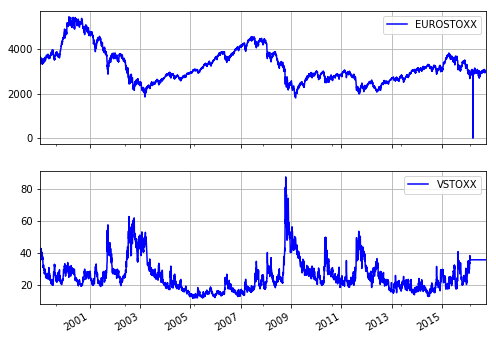

In [11]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

/home/tomjones/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe846b2b890>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fe8462af690>], dtype=object)

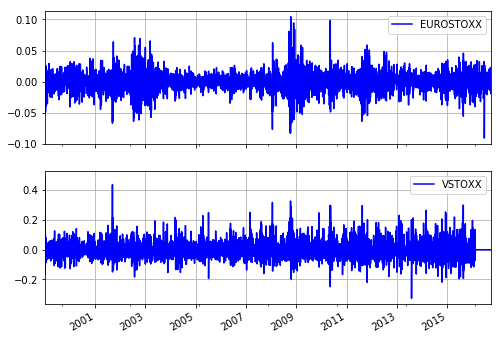

In [48]:
# logs of the returns
rets = np.log(data/data.shift(1))
rets = rets.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
rets.plot(subplots=True, grid=True, style='b', figsize=(8,6))

In [24]:
xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']
model = pd.ols(y=ydat, x=xdat)
model.beta

x           -2.753853
intercept    0.000049
dtype: float64

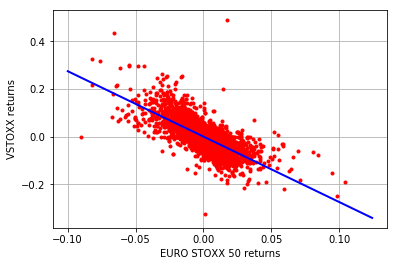

In [25]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis() # grab axis values
x = np.linspace(ax[0], ax[1]+0.01)
plt.plot(x, model.beta[1] + model.beta[0] * x,'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')


In [26]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.724945
VSTOXX,-0.724945,1.000000


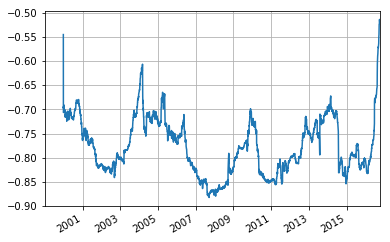

In [47]:
#pd.rolling_corr(rets['EUROSTOXX'],rets['VSTOXX'],window=252).plot(grid=True,style='b)
rets['EUROSTOXX'].rolling(window=252).corr(rets['VSTOXX']).plot(grid=True)